# Visualisation
# Lab 11 - Uncertainty

# Tutorial Section

In [1]:
# Here we import all packages we need.

# This is a package for handling and manipulating data.
import pandas as pd

# This is the standard package for plotting.
from matplotlib import pyplot as plt 

# Seaborn is build on matplotlib.
# It is more comfortable to use than pure matplotlib.
import seaborn as sns

# Numpy helps as handling arrays of numbers and generating random samples
import numpy as np

# This inceases the image resolution
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 90


## Error Bars and Axis Limits 
Seaborn can automatically produce error bars. In the exercises below, you will calculate your own error bars and overlay them on the original plot.

<AxesSubplot:xlabel='island', ylabel='flipper_length_mm'>

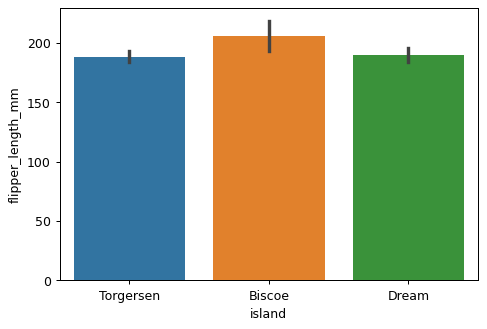

In [2]:
penguins = sns.load_dataset("penguins")
sns.barplot(data=penguins.query('sex=="Female"'), x= 'island', y='flipper_length_mm', ci ='sd')

<AxesSubplot:xlabel='island', ylabel='flipper_length_mm'>

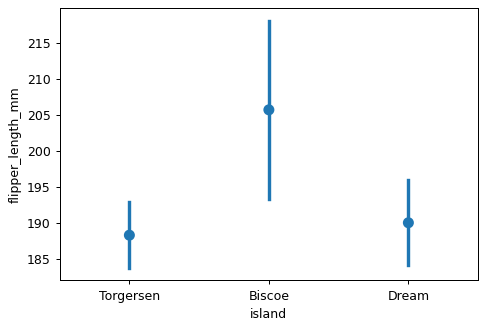

In [3]:
sns.pointplot(data=penguins.query('sex=="Female"'), x= 'island', y='flipper_length_mm', linestyles= '', ci='sd')

<AxesSubplot:xlabel='island', ylabel='flipper_length_mm'>

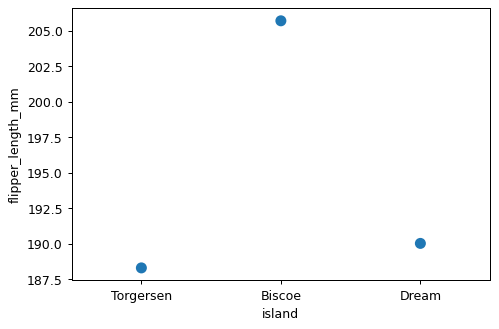

In [4]:
# If you do not want a seaborn CI, set 'ci=None'
sns.pointplot(data=penguins.query('sex=="Female"'), x= 'island', y='flipper_length_mm', linestyles= '', ci=None)

<ErrorbarContainer object of 3 artists>

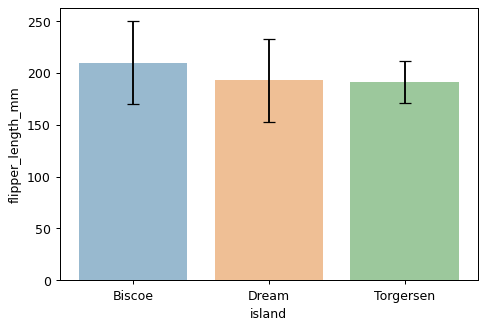

In [5]:
# This is how we will overlay our own error bars
islandMeans=penguins.groupby('island').mean().reset_index()

# Here, we use a constant error.
# You will later have to calculate confidence intervals and plot
# them by replacing the constant value.
error=[40,40,20]

sns.barplot(data=islandMeans, x= 'island', y='flipper_length_mm', alpha=0.5)
plt.errorbar(data=islandMeans, y="flipper_length_mm", x = 'island', fmt='none', yerr=error,
             ecolor='k', capsize=5)


(100.0, 400.0)

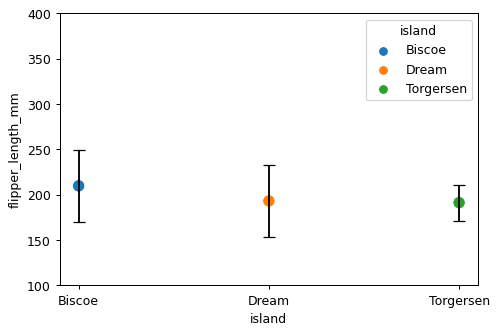

In [6]:
# We can do the same with a scatterplot

sns.scatterplot(data=islandMeans, y="flipper_length_mm", x = 'island', s=100, hue='island')
plt.errorbar(data=islandMeans, y="flipper_length_mm", x = 'island', fmt='none', yerr=error,
             ecolor='k', capsize=5)

# We can use this to manually set the axis limits
plt.ylim([100,400])


---

# Exercises

# Exercise 1
Load the file `Blood_Pressure.csv`. It contains blood pressure data for two patients (A and B).
Display the distribution of measurements for both patients in a suitable way.

Compute the 90% central confidence intervals for both patients and the 90% central credible intervals.
You can assume that the measurement error follows a normal distribution with standard deviation $\sigma=15$.
The distribution of blood pressure in the population is a normal distribution with center $\mu_p = 85$ and standard deviation $\sigma_p=10$.
Display the results in a suitable way that allows comparing them.
Overlay the results with the mean values.

Can you compare your results to the error bars produced by seaborn?

How do the results change when you assume the population standard deviation to be $\sigma_p=5$.

In [7]:
# Please implement
bp = pd.read_csv('Blood_Pressure.csv')
bp

,Measurement,Diastolic Blood Pressure (mmHg),Patient
0,1,122.365180,A
1,2,88.823654,A
2,3,90.077424,A
3,4,81.905471,A
4,5,110.981114,A
5,6,63.476920,A
6,7,124.172176,A
7,8,86.581896,A
8,9,102.785586,A
9,10,94.259444,A


## Computing the Confidence Intervals
### We will first compute the mean for both patients.
Confidence intervals are centered at the sample mean $\bar{x}$. We will compute them first.

In [8]:
means = bp.groupby('Patient').mean()

x_bar_A = means['Diastolic Blood Pressure (mmHg)']['A']
x_bar_B = means['Diastolic Blood Pressure (mmHg)']['B']

means=means.reset_index()

print('x_bar A:', x_bar_A)
print('x_bar B:', x_bar_B)

x_bar A: 97.80905168730271
x_bar B: 69.12227170611489


### We now have to compute the standard deviation of the sample mean distribution:
This is 
$$\bar{\sigma}=\frac{\sigma_{\bar{x}} }{\sqrt{n}},$$

where $n$ is the number of samples. It is $n=25$ for patient A and $n=6$ for patient B. The standard deviation of our measurement error was given as $\sigma=15$. So we can compute for both patients:

In [9]:
sigma = 15

sigma_bar_A = sigma/np.sqrt(25) 
print('sigma_bar_A:',sigma_bar_A)

sigma_bar_B = sigma/np.sqrt(6) 
print('sigma_bar_B:',sigma_bar_B)

sigma_bar_A: 3.0
sigma_bar_B: 6.123724356957946


### We can now calculate the intervals:
The interval is centered around the sample mean and calculated as: 
$$[\bar{x}-z \cdot \bar{\sigma}, \bar{x}+z \cdot \bar{\sigma}],$$
where $z=1.645$ (for a 90$\%$ interval) can be looked up in the slides. 

In [10]:
z= 1.645
a_A= x_bar_A - z * sigma_bar_A
b_A= x_bar_A + z * sigma_bar_A
print('Confidence Interval (Patient A):','['+str(round(a_A,2))+', '+str(round(b_A,2))+']' )

a_B= x_bar_B - z * sigma_bar_B
b_B= x_bar_B + z * sigma_bar_B
print('Confidence Interval (Patient B):','['+str(round(a_B,2))+', '+str(round(b_B,2))+']' )

Confidence Interval (Patient A): [92.87, 102.74]
Confidence Interval (Patient B): [59.05, 79.2]


### Let's now plot the confidence intervals:

<ErrorbarContainer object of 3 artists>

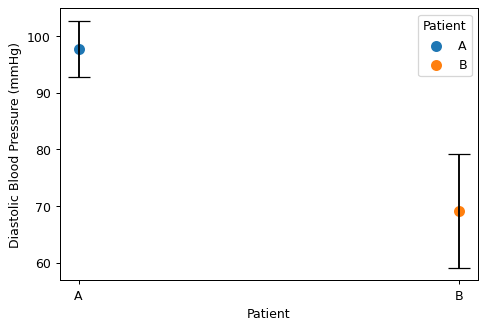

In [11]:
# We first plot the means 
sns.pointplot(data=bp, x= 'Patient', y='Diastolic Blood Pressure (mmHg)', linestyles= '', ci=None, hue='Patient')

# You can use this line, to compare the results to seaborns intervals.
#sns.pointplot(data=bp, x= 'Patient', y='Diastolic Blood Pressure (mmHg)', linestyles= '', ci=90, hue='Patient')

# And then overlay our error bars
error_conf =[z * sigma_bar_A, z * sigma_bar_B]
centres_conf =[x_bar_A, x_bar_B]
plt.errorbar(y = centres_conf, x =  means['Patient'], fmt='none', yerr=error_conf,
             ecolor='k', capsize=9)

## Computing the Credible Intervals ($ \sigma_p = 10 $)
The credible interval is an interval on the posterior distribution.
Since the prior and the observation likelihood follow a normal distribution, we know that the posterior will also follow a normal distribution. To compute the interval, we have to find the mean and the standard deviation of the posterior distribution.
### Computing the mean of the posterior:
The mean is a weighted average of sample mean $\bar{x}$ and the mean $\mu_p$ of the prior

$$ 
\mu_{post} = 
\frac { \bar{x} \sigma_p^2  + \mu_p \bar{\sigma}^2}
{\bar{\sigma}^2 + \sigma_p^2} .
$$
(See slide 12 in the credible interval deck.)

In [12]:
# Lets start by defining the missing variables
mu_p = 85
sigma_p = 10
var_p = sigma_p**2

var_bar_A = sigma_bar_A**2
var_bar_B = sigma_bar_B**2


In [13]:
mu_post_A = (x_bar_A * var_p + mu_p * var_bar_A) / (var_p + var_bar_A)
print('mu_post_A:',mu_post_A)

mu_post_B = (x_bar_B * var_p + mu_p * var_bar_B) / (var_p + var_bar_B)
print('mu_post_B:',mu_post_B)

mu_post_A: 96.75142356633276
mu_post_B: 73.45256124081084


### Computing the standard deviation of the posterior:
The standard deviation can be computed as

$$ 
\sigma_{post} = 
\sqrt{
\frac { \sigma_p^2  \cdot \bar{\sigma}^2}
{\bar{\sigma}^2 + \sigma_p^2}
}.
$$
(See slide 12 in the credible interval deck.)

In [14]:
sigma_post_A = np.sqrt( (var_p * var_bar_A) / (var_p + var_bar_A) )
print('sigma_post_A:',sigma_post_A)

sigma_post_B = np.sqrt( (var_p * var_bar_B) / (var_p + var_bar_B) )
print('sigma_post_B:',sigma_post_B)

sigma_post_A: 2.873478855663454
sigma_post_B: 5.222329678670936


### We can now calculate the intervals:
The interval is centered around $\mu_{post}$ and calculated as: 
$$[\mu_{post}-z \cdot \sigma_{post}, \mu_{post}+z \cdot \sigma_{post}],$$
where $z=1.645$ (for a 90$\%$ interval) can be looked up in the slides. 

In [15]:
z= 1.645
a_A= mu_post_A - z * sigma_post_A
a_A= mu_post_A + z * sigma_post_A
print('Credible Interval (Patient A):','['+str(round(a_A,2))+', '+str(round(b_A,2))+']' )

a_B= mu_post_B - z * sigma_post_B
a_B= mu_post_B + z * sigma_post_B
print('Credible Interval (Patient B):','['+str(round(a_B,2))+', '+str(round(b_B,2))+']' )

Credible Interval (Patient A): [101.48, 102.74]
Credible Interval (Patient B): [82.04, 79.2]


### Let's now plot the credible intervals:

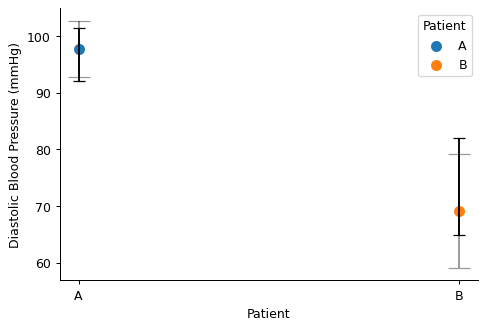

In [16]:
# We first plot the means 
sns.pointplot(data=bp, x= 'Patient', y='Diastolic Blood Pressure (mmHg)', linestyles= '', ci=None, hue='Patient')
#sns.pointplot(data=bp, x= 'Patient', y='Diastolic Blood Pressure (mmHg)', linestyles= '', ci=90, hue='Patient')


# Let's superimpose the confidence intervals
plt.errorbar(y = centres_conf, x =  means['Patient'], fmt='none', yerr=error_conf,
             ecolor='k', capsize=9, alpha=0.4)


# And then overlay our credible interval error bars
error_cred =[z * sigma_post_A, z * sigma_post_B]
centres_cred =[mu_post_A, mu_post_B]
plt.errorbar(y = centres_cred, x =  means['Patient'], fmt='none', yerr=error_cred,
             ecolor='k', capsize=5)

sns.despine()

## Computing the Credible Intervals ($ \sigma_p = 5 $)
We will now repeat the calculation assuming the standard deviation of the prior to be $ \sigma_p = 5 $.

### Computing the mean of the posterior:

In [17]:
# Lets start by defining the missing variables
mu_p = 85
sigma_p = 5
var_p = sigma_p**2

var_bar_A = sigma_bar_A**2
var_bar_B = sigma_bar_B**2

In [18]:
mu_post_A = (x_bar_A * var_p + mu_p * var_bar_A) / (var_p + var_bar_A)
print('mu_post_A:',mu_post_A)

mu_post_B = (x_bar_B * var_p + mu_p * var_bar_B) / (var_p + var_bar_B)
print('mu_post_B:',mu_post_B)

mu_post_A: 94.41842035831081
mu_post_B: 78.64890868244596


### Computing the standard deviation of the posterior:

In [19]:
sigma_post_A = np.sqrt( (var_p * var_bar_A) / (var_p + var_bar_A) )
print('sigma_post_A:',sigma_post_A)

sigma_post_B = np.sqrt( (var_p * var_bar_B) / (var_p + var_bar_B) )
print('sigma_post_B:',sigma_post_B)

sigma_post_A: 2.5724787771376323
sigma_post_B: 3.872983346207417


### We can now calculate the intervals:

In [20]:
z= 1.645
a_A= mu_post_A - z * sigma_post_A
a_A= mu_post_A + z * sigma_post_A
print('Credible Interval (Patient A):','['+str(round(a_A,2))+', '+str(round(b_A,2))+']' )

a_B= mu_post_B - z * sigma_post_B
a_B= mu_post_B + z * sigma_post_B
print('Credible Interval (Patient B):','['+str(round(a_B,2))+', '+str(round(b_B,2))+']' )

Credible Interval (Patient A): [98.65, 102.74]
Credible Interval (Patient B): [85.02, 79.2]


### Let's now plot the credible intervals:

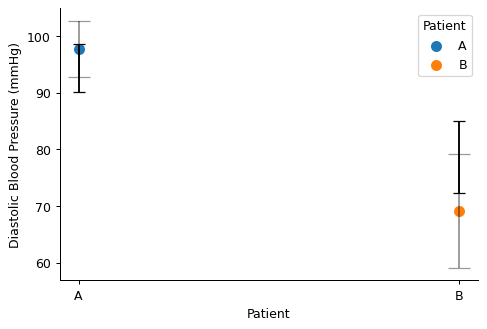

In [21]:
# We first plot the means 
sns.pointplot(data=bp, x= 'Patient', y='Diastolic Blood Pressure (mmHg)', linestyles= '', ci=None, hue='Patient')
#sns.pointplot(data=bp, x= 'Patient', y='Diastolic Blood Pressure (mmHg)', linestyles= '', ci=90, hue='Patient')


# Let's superimpose the confidence intervals
plt.errorbar(y = centres_conf, x =  means['Patient'], fmt='none', yerr=error_conf,
             ecolor='k', capsize=9, alpha=0.4)


# And then overlay our credible interval error bars
error_cred =[z * sigma_post_A, z * sigma_post_B]
centres_cred =[mu_post_A, mu_post_B]
plt.errorbar(y = centres_cred, x =  means['Patient'], fmt='none', yerr=error_cred,
             ecolor='k', capsize=5)

sns.despine()